In [1]:
import shutil
import os
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("~/Person-feature-detection/Datasets/celeba-dataset/list_attr_celeba.csv")
attributes = df.columns.tolist()
print(attributes)
print(f"{df['image_id']}, {df['Male']}, {df['Eyeglasses']}") # 1 is Glasses and -1 is No Glasses

['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
0         000001.jpg
1         000002.jpg
2         000003.jpg
3         000004.jpg
4         000005.jpg
             ...    
202594    202595.jpg
202595    202596.jpg
202596    202597.jpg
202597    202598.jpg
202598    202599.jpg
Name: image_id, Length: 202599, dtype: object, 0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
20259

In [3]:
df_filtered = df[['image_id', 'Male', 'Eyeglasses']]
print(df_filtered)

          image_id  Male  Eyeglasses
0       000001.jpg    -1          -1
1       000002.jpg    -1          -1
2       000003.jpg     1          -1
3       000004.jpg    -1          -1
4       000005.jpg    -1          -1
...            ...   ...         ...
202594  202595.jpg    -1          -1
202595  202596.jpg     1          -1
202596  202597.jpg     1           1
202597  202598.jpg    -1          -1
202598  202599.jpg    -1          -1

[202599 rows x 3 columns]


/tmp/ipykernel_9498/2482693862.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('Eyeglasses', group_keys=False).apply(lambda x: x.sample(min(len(x), 4000), random_state=42))


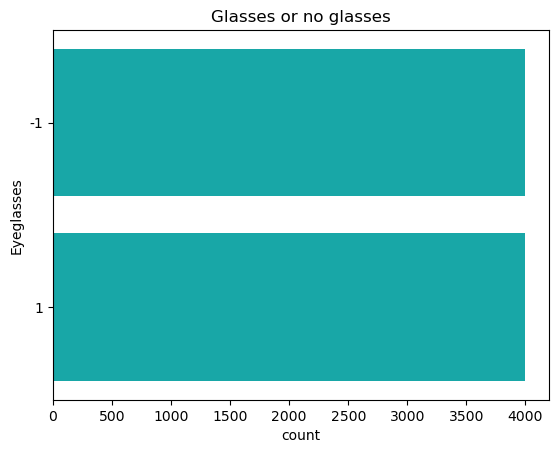

[-1  1]


Eyeglasses
-1    4000
 1    4000
Name: count, dtype: int64

In [4]:
df_sampled = df_filtered.groupby('Eyeglasses', group_keys=False).apply(lambda x: x.sample(min(len(x), 4000), random_state=42))

plt.title('Glasses or no glasses')
sns.countplot(y=df_sampled['Eyeglasses'], color="c")
plt.show()

print(df_sampled['Eyeglasses'].unique())
df_sampled['Eyeglasses'].value_counts()

In [6]:
source_folder = os.path.expanduser("~/Person-feature-detection/Datasets/celeba-dataset/img_align_celeba/img_align_celeba")
glasses_folder = os.path.expanduser("~/Person-feature-detection/glasses/Glasses/")
no_glasses_folder = os.path.expanduser("~/Person-feature-detection/glasses/No_Glasses/")

os.makedirs(glasses_folder, exist_ok=True)
os.makedirs(no_glasses_folder, exist_ok=True)

for _, row in df_sampled.iterrows():
    image_name = row['image_id']
    glasses = row['Eyeglasses']
    
    source_path = os.path.join(source_folder, image_name)
    
    if glasses == 1:
        target_path = os.path.join(glasses_folder, image_name)
    else:
        target_path = os.path.join(no_glasses_folder, image_name)
    
    if os.path.exists(source_path):
        shutil.copy(source_path, target_path)
    else:
        print(f"File not found: {source_path}")

In [7]:
train_folder = os.path.expanduser("~/Person-feature-detection/glasses/Train/")
val_folder = os.path.expanduser("~/Person-feature-detection/glasses/Validate/")
test_folder = os.path.expanduser("~/Person-feature-detection/glasses/Test/")

os.makedirs(os.path.join(train_folder, "Glasses"), exist_ok=True)
os.makedirs(os.path.join(train_folder, "No Glasses"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "Glasses"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "No Glasses"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "Glasses"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "No Glasses"), exist_ok=True)

def move_images(images, source_folder, target_folder):
    for image in images:
        source_path = os.path.join(source_folder, image)
        
        if os.path.isfile(source_path):
            target_path = os.path.join(target_folder, image)
            shutil.copy(source_path, target_path)
        else:
            print(f"Skipped: {source_path} (It's a dir not a file)")

glasses_images = os.listdir(glasses_folder)
no_glasses_images = os.listdir(no_glasses_folder)

glasses_train, glasses_temp = train_test_split(glasses_images, test_size=0.2, random_state=42)
glasses_val, glasses_test = train_test_split(glasses_temp, test_size=0.5, random_state=42)

no_glasses_train, no_glasses_temp = train_test_split(no_glasses_images, test_size=0.2, random_state=42)
no_glasses_val, no_glasses_test = train_test_split(no_glasses_temp, test_size=0.5, random_state=42)

move_images(glasses_train, glasses_folder, os.path.join(train_folder, "Glasses"))
move_images(glasses_val, glasses_folder, os.path.join(val_folder, "Glasses"))
move_images(glasses_test, glasses_folder, os.path.join(test_folder, "Glasses"))

move_images(no_glasses_train, no_glasses_folder, os.path.join(train_folder, "No Glasses"))
move_images(no_glasses_val, no_glasses_folder, os.path.join(val_folder, "No Glasses"))
move_images(no_glasses_test, no_glasses_folder, os.path.join(test_folder, "No Glasses"))